# Project 6

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


In [26]:
df = pd.read_csv('dataset/RRCA_baseflow.csv')
df['Date'] = df['Date'] - 693963# subtract to get date correct.
df['Readable_Date'] = pd.to_datetime(df.Date.astype('int'), unit='D', origin=pd.Timestamp('1900-01-01'))
df['year'] = df.Readable_Date.apply(lambda x:pd.to_datetime(x).year)
df['month'] = df.Readable_Date.apply(lambda x:pd.to_datetime(x).month)
df['day'] = df.Readable_Date.apply(lambda x:pd.to_datetime(x).day)

display(df)
display(f'Unique dates sampled: {len(df.Date.unique()), df.Date.unique().tolist()}')
display(f'Unique segments sampled: {len(df.Segment_id.unique()), df.Date.unique().tolist()}')
bySegment = df.groupby('Segment_id').count()
display(bySegment)
display(bySegment.std().Date)
display(bySegment.mean().Date)
# TODO: Drop segments with very few (or very many?) samples
# df = df.groupby('Segment_id').filter(lambda x: len(x) >= 75)#gets rid of the segments with less than 75 samples
segmentMinMax = df.groupby('Segment_id')['Date'].agg(['min', 'max']).reset_index()
display(segmentMinMax.sort_values(['min', 'max']))
display(segmentMinMax.sort_values(['max', 'min']))

display(segmentMinMax.sort_values('min')['min'].unique())
display(segmentMinMax.sort_values('max')['max'].unique())

#Your task is to experiment with linear regression on this dataset. This is a difficult dataset to interpret, and most of your time will be looking at scatterplots, 
#looking at the data over time, looking at positional data, looking at individual segments, and doing background research. Just running regression and looking at the p values 
#for different attributes is most definitely not enough.


,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Readable_Date,year,month,day
0,16769,144,1086190,14476800,0.59,18.99,0.0,0.145161,1945-11-30,1945,11,30
1,16800,144,1086190,14476800,0.97,29.63,0.0,0.445161,1945-12-31,1945,12,31
2,16828,144,1086190,14476800,1.34,29.63,0.0,1.332203,1946-01-28,1946,1,28
3,16859,144,1086190,14476800,1.79,29.63,0.0,2.932203,1946-02-28,1946,2,28
4,16889,144,1086190,14476800,8.23,29.63,0.0,3.728689,1946-03-30,1946,3,30
...,...,...,...,...,...,...,...,...,...,...,...,...
15586,27847,98,721870,14387040,0.00,0.00,0.0,0.298500,1976-03-30,1976,3,30
15587,27878,98,721870,14387040,0.00,0.00,0.0,0.211475,1976-04-30,1976,4,30
15588,27908,98,721870,14387040,0.00,0.00,0.0,0.122951,1976-05-30,1976,5,30
15589,27939,98,721870,14387040,0.00,0.00,0.0,0.120000,1976-06-30,1976,6,30


'Unique dates sampled: (732, [16769, 16800, 16828, 16859, 16889, 16920, 16950, 16981, 17012, 17042, 17073, 17103, 17134, 17165, 17193, 17224, 17254, 17285, 17315, 17346, 17377, 17407, 17620, 17651, 17681, 17712, 17743, 17773, 17924, 17955, 17985, 18016, 18046, 18077, 18108, 18138, 18169, 18199, 18230, 18261, 18289, 18320, 18350, 18381, 18411, 18442, 18473, 18503, 18595, 18626, 18654, 18685, 18715, 18746, 18776, 18807, 18838, 18868, 18899, 18929, 18960, 18991, 19020, 19051, 19081, 19112, 19142, 19173, 19204, 19234, 19385, 19416, 19446, 19477, 19507, 19538, 35091, 35122, 35152, 35183, 35213, 35244, 35275, 35305, 35336, 35366, 35397, 35428, 35456, 35487, 35517, 35548, 35578, 35609, 35762, 35793, 35821, 35852, 35882, 35913, 35943, 35974, 36005, 36035, 36186, 36217, 36247, 36278, 36308, 36339, 36370, 36400, 36492, 36523, 36552, 36583, 36613, 36644, 22917, 22947, 22978, 23009, 23037, 23068, 23098, 23129, 23159, 23190, 23221, 23251, 23282, 23312, 23343, 23374, 23403, 23434, 23464, 23495, 2352

'Unique segments sampled: (42, [16769, 16800, 16828, 16859, 16889, 16920, 16950, 16981, 17012, 17042, 17073, 17103, 17134, 17165, 17193, 17224, 17254, 17285, 17315, 17346, 17377, 17407, 17620, 17651, 17681, 17712, 17743, 17773, 17924, 17955, 17985, 18016, 18046, 18077, 18108, 18138, 18169, 18199, 18230, 18261, 18289, 18320, 18350, 18381, 18411, 18442, 18473, 18503, 18595, 18626, 18654, 18685, 18715, 18746, 18776, 18807, 18838, 18868, 18899, 18929, 18960, 18991, 19020, 19051, 19081, 19112, 19142, 19173, 19204, 19234, 19385, 19416, 19446, 19477, 19507, 19538, 35091, 35122, 35152, 35183, 35213, 35244, 35275, 35305, 35336, 35366, 35397, 35428, 35456, 35487, 35517, 35548, 35578, 35609, 35762, 35793, 35821, 35852, 35882, 35913, 35943, 35974, 36005, 36035, 36186, 36217, 36247, 36278, 36308, 36339, 36370, 36400, 36492, 36523, 36552, 36583, 36613, 36644, 22917, 22947, 22978, 23009, 23037, 23068, 23098, 23129, 23159, 23190, 23221, 23251, 23282, 23312, 23343, 23374, 23403, 23434, 23464, 23495, 23

,Date,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,Readable_Date,year,month,day
Segment_id,,,,,,,,,,,
40,324,324,324,324,324,324,324,324,324,324,324
51,495,495,495,495,495,495,495,495,495,495,495
53,240,240,240,240,240,240,240,240,240,240,240
55,482,482,482,482,482,482,482,482,482,482,482
56,653,653,653,653,653,653,653,653,653,653,653
59,720,720,720,720,720,720,720,720,720,720,720
60,480,480,480,480,480,480,480,480,480,480,480
62,66,66,66,66,66,66,66,66,66,66,66
63,102,102,102,102,102,102,102,102,102,102,102


240.93350319470406

371.2142857142857

,Segment_id,min,max
15,123,14516,14729
37,194,14516,16677
34,186,14516,17773
40,239,14516,18108
41,256,14516,18108
39,205,14516,18138
2,53,14516,18503
28,157,14516,18534
29,159,14516,22156
36,189,14516,36339


,Segment_id,min,max
15,123,14516,14729
37,194,14516,16677
34,186,14516,17773
40,239,14516,18108
41,256,14516,18108
39,205,14516,18138
2,53,14516,18503
28,157,14516,18534
7,62,17620,19599
32,176,16738,20695


array([14516, 14882, 14974, 16190, 16251, 16738, 16769, 16828, 16920,
       16950, 17073, 17620, 17804, 18289, 18381, 18411, 18626, 18715,
       18746, 21729, 22187, 22825, 22917, 28396], dtype=int64)

array([14729, 16677, 17773, 18108, 18138, 18503, 18534, 19599, 20695,
       21425, 22156, 25382, 26173, 27970, 31591, 34574, 34666, 36339,
       36400, 36644, 36705, 36766], dtype=int64)

,year,Observed
0,1939,39.799919
1,1940,65.236706
2,1941,92.632985
3,1942,94.358681
4,1943,59.426927
...,...,...
57,1996,13.397455
58,1997,12.324935
59,1998,11.377356
60,1999,10.239338


<Axes: xlabel='year', ylabel='Observed'>

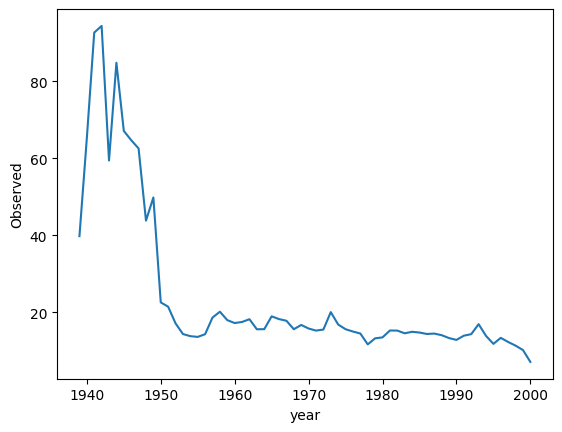

In [28]:
avgObservedPerYear = df.groupby('year')['Observed'].mean().reset_index()
display(avgObservedPerYear)

sns.lineplot(data=avgObservedPerYear, x='year', y='Observed')

,month,Observed
0,1,27.945181
1,2,29.835620
2,3,29.893372
3,4,28.056454
4,5,24.900914
5,6,19.755097
6,7,17.076248
7,8,17.411985
8,9,19.159330
9,10,22.398315


<Axes: xlabel='month', ylabel='Observed'>

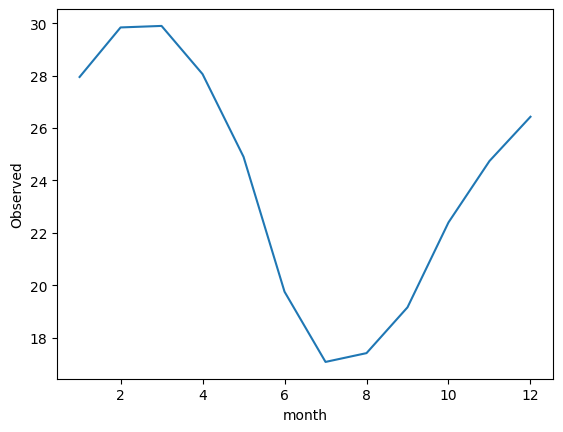

In [29]:
avgObservedPerMonth = df.groupby('month')['Observed'].mean().reset_index()
display(avgObservedPerMonth)

sns.lineplot(data=avgObservedPerMonth, x='month', y='Observed')

,year,month,Observed
0,1939,9,21.068449
1,1939,10,34.766305
2,1939,11,46.621907
3,1939,12,56.743013
4,1940,1,72.173740
...,...,...,...
727,2000,4,7.175279
728,2000,5,5.352061
729,2000,6,4.399778
730,2000,7,4.042711


<Axes: xlabel='month', ylabel='Observed'>

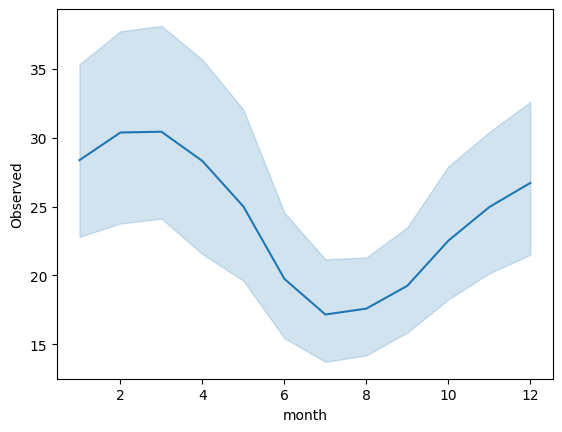

In [32]:
avgObservedByMonth = df.groupby(['year', 'month'])['Observed'].mean().reset_index()
display(avgObservedByMonth)

sns.lineplot(data=avgObservedByMonth, x='month', y='Observed')

,year,month,Observed,month_year
0,1939,9,21.068449,23277
1,1939,10,34.766305,23278
2,1939,11,46.621907,23279
3,1939,12,56.743013,23280
4,1940,1,72.173740,23281
...,...,...,...,...
727,2000,4,7.175279,24004
728,2000,5,5.352061,24005
729,2000,6,4.399778,24006
730,2000,7,4.042711,24007


<Axes: xlabel='month_year', ylabel='Observed'>

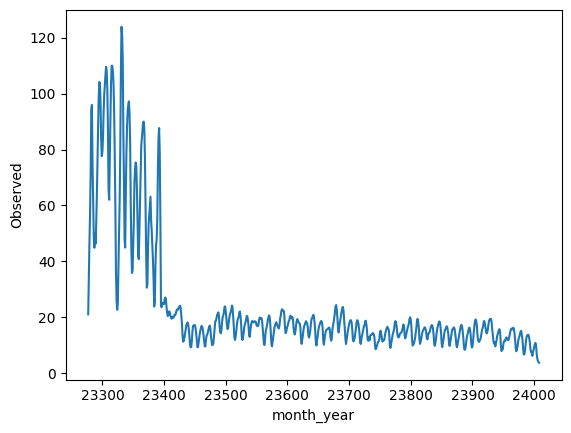

In [39]:
avgObservedByMonth = df.groupby(['year', 'month'])['Observed'].mean().reset_index()
avgObservedByMonth['month_year'] = avgObservedByMonth['month'] + avgObservedByMonth['year'] * 12
display(avgObservedByMonth)

sns.lineplot(data=avgObservedByMonth, x='month_year', y='Observed')

### Looking at scatterplots data over time, positional data, individual segments, and doing background research.

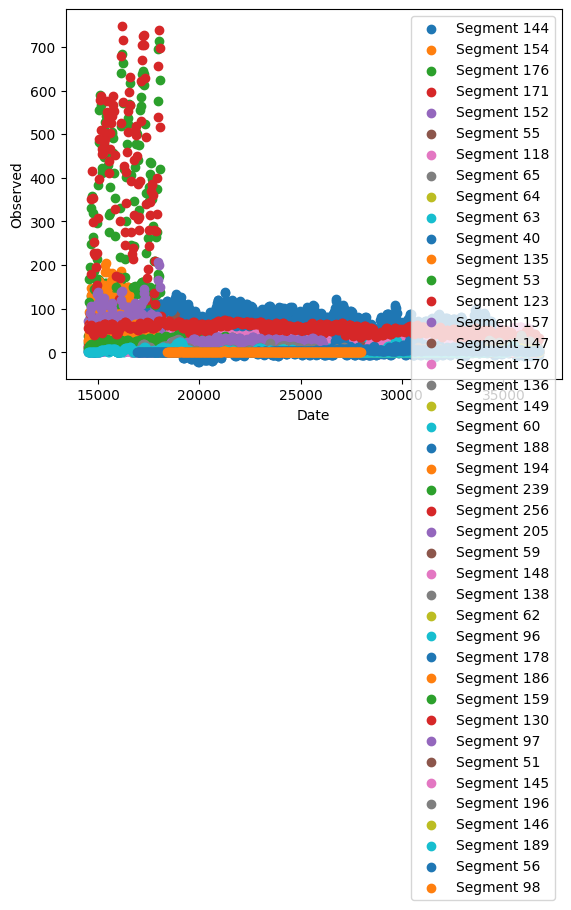

,Date,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
Segment_id,,,,,,,
96,732,732,732,732,732,732,732
130,732,732,732,732,732,732,732


In [19]:
#First lets do some scatterplots
for segment_id in df['Segment_id'].unique():
  segment_data = df[df['Segment_id'] == segment_id]
  plt.scatter(segment_data['Date'], segment_data['Observed'], label=f'Segment {segment_id}')
  
plt.xlabel('Date')
plt.ylabel('Observed')
plt.legend(loc='best')  # Change the position of the legend to upper right
plt.show()
# First let's do some scatterplots
top_two_segments = bySegment.nlargest(2, 'Date')
display(top_two_segments)

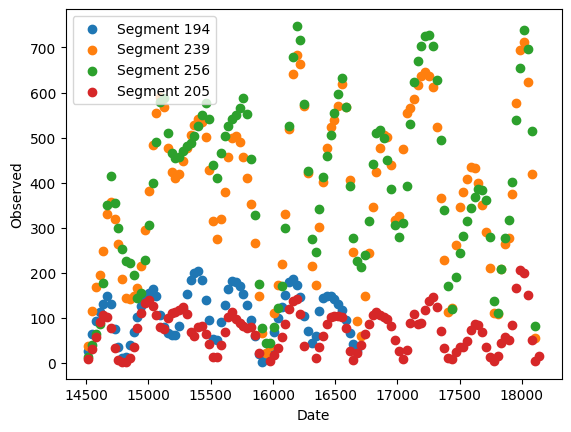

In [20]:
for segment_id in df['Segment_id'].unique():
    segment_data = df[df['Segment_id'] == segment_id]
    if segment_data['Observed'].max() > 200:
        plt.scatter(segment_data['Date'], segment_data['Observed'], label=f'Segment {segment_id}')

plt.xlabel('Date')
plt.ylabel('Observed')
plt.legend(loc='best')  # Change the position of the legend to upper right
plt.show()

In [21]:
# here we see the top three best observed output, its intereting as they only go until 18000 while all the data goes to 35000

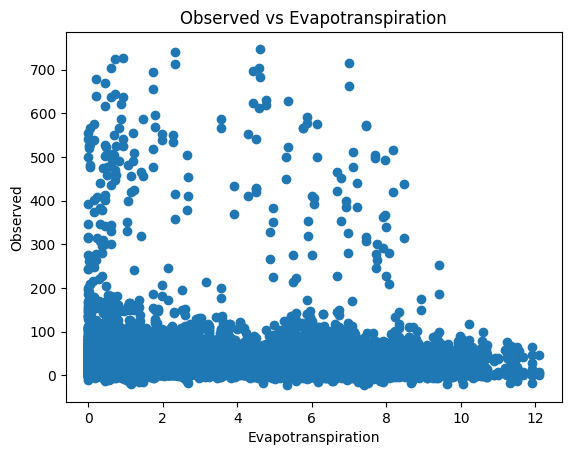

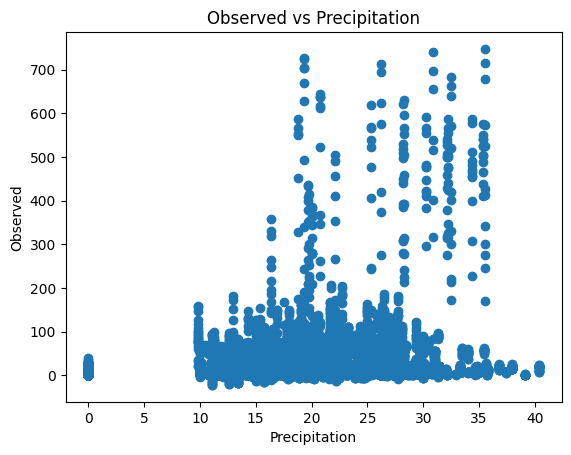

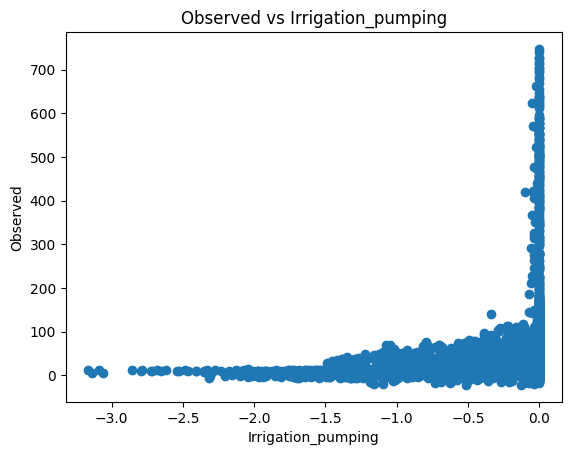

In [22]:
plt.scatter(df['Evapotranspiration'], df['Observed'])
plt.xlabel('Evapotranspiration')
plt.ylabel('Observed')
plt.title('Observed vs Evapotranspiration')
plt.show()

plt.scatter(df['Precipitation'], df['Observed'])
plt.xlabel('Precipitation')
plt.ylabel('Observed')
plt.title('Observed vs Precipitation')
plt.show()

plt.scatter(df['Irrigation_pumping'], df['Observed'])
plt.xlabel('Irrigation_pumping')
plt.ylabel('Observed')
plt.title('Observed vs Irrigation_pumping')
plt.show()


